вариант №2 -  15

Найти решение краевой задачи для одномерного стационарного уравнения теплопроводности

$\frac{d}{dx}[k(x)\frac{dU}{dx}] - q(x)U = -f(x)$

в 11-ти равноудаленных точках отрезка [0,1] с относительной точностью 0.0001.

Краевые условия задачи (условия периодичности)

$U(0+0) = U(1-0)$,

$k(0+0)U^{'}_x (0+0) = k(1-0)U^{'}_x(1-0)$,

$k(x) = 1; q(x) =\ln{(\sin{2\pi x}+2)}; f(x) = \cos{2 \pi x}$

Модельная задача

$k(x) = 1; q(x) = \ln{2}; f(x) =  \cos{2 \pi x}$

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math 

In [8]:
a = 0 
b = 1 
L = 11 
h = (b - a) / L
acc = 0.0001
k = 1
def q(x):
    q = mh.log(2+mh.sin(2*mh.pi*x))
    return q

def f(x):
    f = mh.cos(2*mh.pi*x)

модельная задача

In [9]:
k_m =  1
q_m = math.log(2)
f_m = lambda x: math.cos(2 * math.pi * x)

Так как в нашей задаче k(x) = const, то можно записать граничные условия в следующем виде:
$$u(0 + 0) = u(1 - 0)$$
$$u'_x(0 + 0) = u'_x(1 - 0)$$

Модельная задача выглядит так:
$$\frac{d^2 u}{dx^2} - ln(2)u = - cos(2 \pi x),$$

что легко преобразовывается к системе: 
$$\frac{u_{l - 1} - 2 u_l + u_{l + 1}}{h ^ 2} - ln(2) u_l = - f_l, \quad l=1, ..., 10$$
где $f_l = cos(2 \pi h \cdot l), \quad l=0,..,11$

Таким образом, совмещая эту систему и граничные условия (в нашем случае - периодические), получаем систему из L+1 уровнений относительно L+1 неизвестного

В нашей лабораторной эту систему предлагается решать *методом прогонки*.

Он состоит из двух этапов: прямой и обратный. При прямом ходе мы сводим нашу систему к виду 
$$u_{l - 1} = \alpha_{l-1} u_l + \beta_{l - 1},$$
где коэффициенты $\alpha$ и $\beta$ получаются в процессе последовательного выражения одних неизвестных через другие. Последним шагом прямой прогонки является 
нахождение значения $u_L$. Затем, в процессе обратного хода, подстановкой найденного значения в уравнение мы находим следующую неизвестную, и так пока не закончатся 
уравнения. Таким образом, после всех этих шагов, у нас будет получено решение системы. 


численное решение разностной задачи

In [10]:
def u_model(L, k, q, f):
    h = 1 / L 
    
    av_l = k                                 
    bv_l = -2 * k - q * (h ** 2)
    cv_l = k
    def dv_l(l):
        return -(h ** 2) * f(l * h)
    
    av_0 = 0                                     
    bv_0 = 1
    cv_0 = 0
    dv_0 = 0
    
    av_L = 0                                      
    bv_L = 1
    cv_L = 0
    dv_L = 0
    
    alpha_v = [-av_0 / bv_0]                                   
    beta_v = [dv_0 / bv_0]

    #Тут происходит сама прогонка

    for l in range(1, L):                   
        alpha_v.append(-av_l / (bv_l + cv_l * alpha_v[l-1]))
        beta_v.append((dv_l(l) - cv_l * beta_v[l-1]) / (bv_l + cv_l * alpha_v[l-1]))

    v = np.zeros(L + 1)
    v[-1] = (dv_L - cv_L * beta_v[-1]) / (bv_L + cv_L * alpha_v[-1])

    # А тут обратный ход прогонки 
    for l in range(L-1, -1, -1):                  
        v[l] = alpha_v[l] * v[l+1] + beta_v[l]
    
    
    
    aw_l = k
    bw_l = -2 * k - q * (h**2)
    cw_l = k
    dw_l = 0
    
    aw_0 = 0
    bw_0 = 1
    cw_0 = 0
    dw_0 = 1
    
    aw_L = 0
    bw_L = 1
    cw_L = 0
    dw_L = 1
    
    alpha_w = [-aw_0 / bw_0]
    beta_w = [dw_0 / bw_0]

    for l in range(1, L):
        alpha_w.append(-aw_l / (bw_l + cw_l * alpha_w[l-1]))
        beta_w.append((dw_l - cw_l * beta_w[l-1]) / (bw_l + cw_l * alpha_w[l-1]))

    w = np.zeros(L + 1)
    w[-1] = (dw_L - cw_L * beta_w[-1]) / (bw_L + cw_L * alpha_w[-1])

    for l in range(L-1, -1, -1):
        w[l] = alpha_w[l] * w[l+1] + beta_w[l]
    
    #находим u_0 по заданной формуле
    u_0 = (k * (v[1] + v[L - 1]) + f(0) * (h ** 2)) / (2 * k + q * (h ** 2) - k * (w[1] + w[L - 1]))
    
    u = np.zeros(L + 1)
    for i in range(L + 1):
        u[i] = v[i] + u_0 * w[i]
        
    return u
    

численное решение разностной задачи с переменными коэффициентами

In [11]:
def u_solution(L, k, q, f):
    h = 1 / L     
    av = [0]
    bv = [1]
    cv = [0]
    dv = [0]
    
    alpha_v = [-av[0] / bv[0]]
    beta_v = [dv[0] / bv[0]]
    
    for l in range(1, L):               
        av.append(k(l * h + h / 2))
        bv.append(-(k(l * h + h / 2) + k(l * h - h / 2) + q(l * h) * h ** 2))
        cv.append(k(l * h - h / 2))
        dv.append(-f(l * h) * h ** 2)
                   
    
    for l in range(1, L):
        alpha_v.append(-av[l] / (bv[l] + cv[l] * alpha_v[l-1]))
        beta_v.append((dv[l] - cv[l]*beta_v[l-1]) / (bv[l] + cv[l]*alpha_v[l-1]))

    av.append(0)
    bv.append(1)
    cv.append(0)
    dv.append(0)
                   
    v = np.empty(L + 1)
    v[-1] = (dv[-1] - cv[-1] * beta_v[-1]) / (bv[-1] + cv[-1] * alpha_v[-1])
                   
    for l in range(L-1, -1, -1):
        v[l] = alpha_v[l] * v[l+1] + beta_v[l]
    
    #Аналогичная задача на w
         
    aw = [0]
    bw = [1]
    cw = [0]
    dw = [1]
    
    alpha_w = [-aw[0] / bw[0]]
    beta_w = [dw[0] / bw[0]]
    
    for l in range(1, L):
        aw.append(k(l * h + h / 2))
        bw.append(-(k(l * h + h / 2) + k(l * h - h / 2) + q(l * h) * h ** 2))
        cw.append(k(l * h - h / 2))
        dw.append(0)
    
    for l in range(1, L):
        alpha_w.append(-aw[l] / (bw[l] + cw[l] * alpha_w[l-1]))
        beta_w.append((dw[l] - cw[l] * beta_w[l-1]) / (bw[l] + cw[l] * alpha_w[l-1]))

    aw.append(0)
    bw.append(1)
    cw.append(0)
    dw.append(1)
                   
    w = np.empty(L + 1)
    w[-1] = (dw[-1] - cw[-1] * beta_w[-1]) / (bw[-1] + cw[-1] * alpha_w[-1])
                   
    for l in range(L-1, -1, -1):
        w[l] = alpha_w[l] * w[l+1] + beta_w[l]
    
    #находим u_0 по заданной формуле
    u_0 = (k(h / 2) * v[1] + k(L * h - h / 2) * v[L - 1] + f(0) * h ** 2) / (k(h / 2)  + k(L * h - h / 2) + q(0) * h ** 2 - k(h / 2) * w[1] - k(L * h - h / 2) * w[L - 1])
    
    u = np.zeros(L + 1)
    for i in range(L + 1):
        u[i] = v[i] + u_0 * w[i]
    
    return u

In [12]:
u_model(L, k_m, q_m, f_m)

array([ 0.02556904,  0.02151005,  0.01062176, -0.00363885, -0.01674416,
       -0.02453332, -0.02453332, -0.01674416, -0.00363885,  0.01062176,
        0.02151005,  0.02556904])

In [14]:
u_solution(L, k, q, f)

TypeError: 'int' object is not callable

Теперь сравним численное и аналитическое решения исходной задачи. 
Аналитическое решение получается тривиально: достаточно решить сначала однородное уравнения, найдя характеристичесие числа, затем частное решение неоднородного и тд, в итоге получаем: 
$$u_{a} = \frac{1}{4 \pi^2 + ln(2)} cos(2 \pi x)$$

<ipython-input-8-36e702a2d11a>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


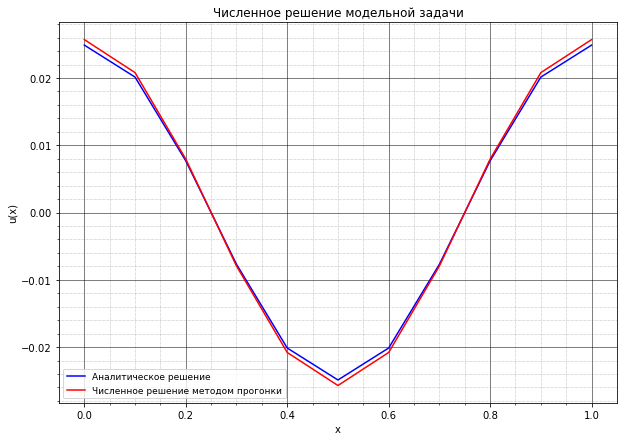

In [8]:
u_mod_a = lambda x: 1 / (4 * math.pi ** 2 + math.log(2)) * np.cos(2 * math.pi * x)
L = 10
grid = np.arange(0, 1 + 1/L, 1 / L)
u_mod_num = u_model(L, k_m, q_m, f_m)


fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(grid, u_mod_a(grid), color='blue', label='Аналитическое решение')
ax.plot(grid, u_mod_num, color='red', label='Численное решение методом прогонки')
ax.set_xlabel('x')
ax.set_ylabel('u(x)')

ax.set_title('Численное решение модельной задачи')
ax.legend(fontsize=9)
ax.grid(which='major',
        color = 'k')
ax.minorticks_on()
ax.grid(which='minor',
        color = 'gray',
        linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)
fig.show()

In [9]:
u_mod_a = lambda x: 1 / (4 * math.pi ** 2 + math.log(2)) * np.cos(2 * math.pi * x)
accuracy_l = []
for i in range(10, 21):
    u_mod_num = u_model(i, k_m, q_m, f_m)
    grid = np.arange(0, 1 + 1 / i, 1/i)
    accuracy_l.append(sum((u_mod_num - u_mod_a(grid))) ** 2 / i)


In [14]:
accuracy_l

[6.731997386118814e-08,
 4.152042454933261e-08,
 2.6736387150970573e-08,
 1.7847180212858435e-08,
 1.2282329342300342e-08,
 8.676886572799286e-09,
 6.270758000974291e-09,
 4.623061060087301e-09,
 3.468862366996417e-09,
 2.6439494772513797e-09,
 2.043714140970418e-09]

<ipython-input-10-c1b5dd9b2eed>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


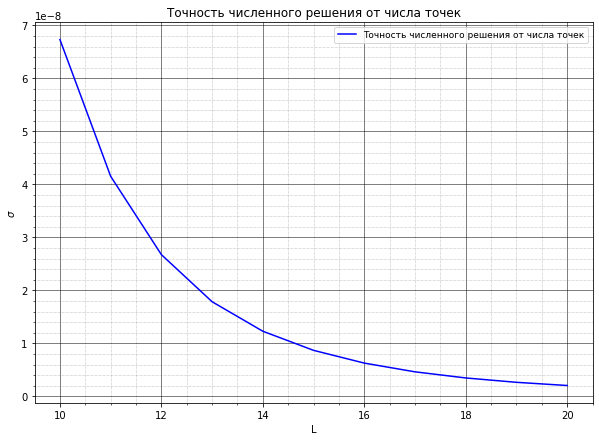

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(np.arange(10, 21, 1), np.array(accuracy_l), color='blue', label='Точность численного решения от числа точек')
ax.set_xlabel('L')
ax.set_ylabel(r'$\sigma$')

ax.set_title('Точность численного решения от числа точек')
ax.legend(fontsize=9)
ax.grid(which='major',
        color = 'k')
ax.minorticks_on()
ax.grid(which='minor',
        color = 'gray',
        linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)
fig.show()

In [11]:
k = lambda x: 1
q = lambda x: np.log(2 + np.sin(2 * x * math.pi)) 
f = lambda x: np.cos(2 * x * math.pi)

<ipython-input-16-11b0b1cc186c>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


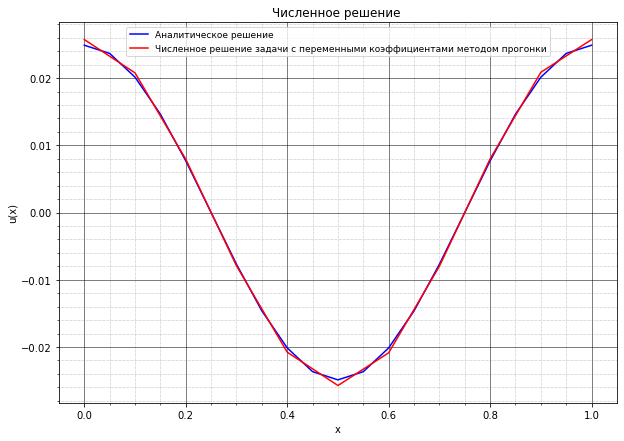

In [16]:
L = 10
grid_p = np.arange(0, 1 + 1/L, 1 / L)
u_num = u_solution(L, k, q, f)


fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(grid, u_mod_a(grid), color='blue', label='Аналитическое решение')
ax.plot(grid_p, u_num, color='red', label='Численное решение задачи с переменными коэффициентами методом прогонки')
ax.set_xlabel('x')
ax.set_ylabel('u(x)')

ax.set_title('Численное решение ')
ax.legend(fontsize=9)
ax.grid(which='major',
        color = 'k')
ax.minorticks_on()
ax.grid(which='minor',
        color = 'gray',
        linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)
fig.show()